In [1]:
import easyocr
import PIL
import matplotlib.pyplot as plt

In [2]:
reader = easyocr.Reader(['en'])
result = reader.readtext('7th_floor.png')

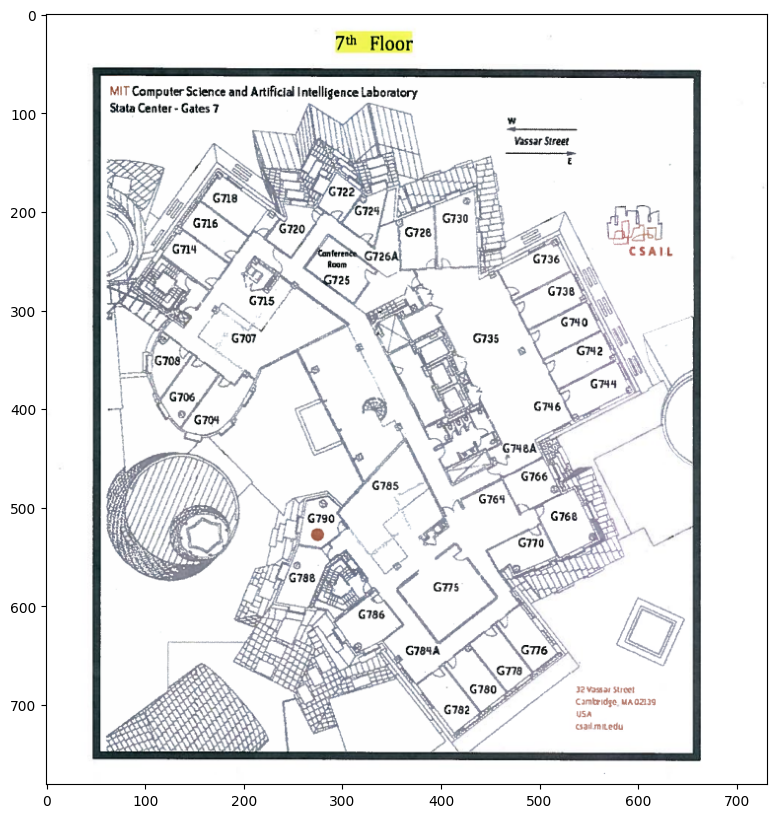

In [3]:
floor_plan = PIL.Image.open('7th_floor.png')
plt.figure(figsize=(20, 10))
plt.imshow(floor_plan)

7th
Floor
MIT Computer Sclence and Artificlal
Intelllgence Laboratory
Stata Center
Gates
Vassar Street
G722
6718
6729
6716
6730
6720
6728
G714
icon [eren 
G726A
cSAIL
Roam
6736
6725
67J8
6715
6740
6707
6735
6742
G708
G744
G706
6746
G704
G7484
6766
6785
6764
G790
676e
6770
G788
G75
6786
G7844
676
678
6780
JYJauAnci
Cimtiotl 4A07jO
G782
@amEcdu


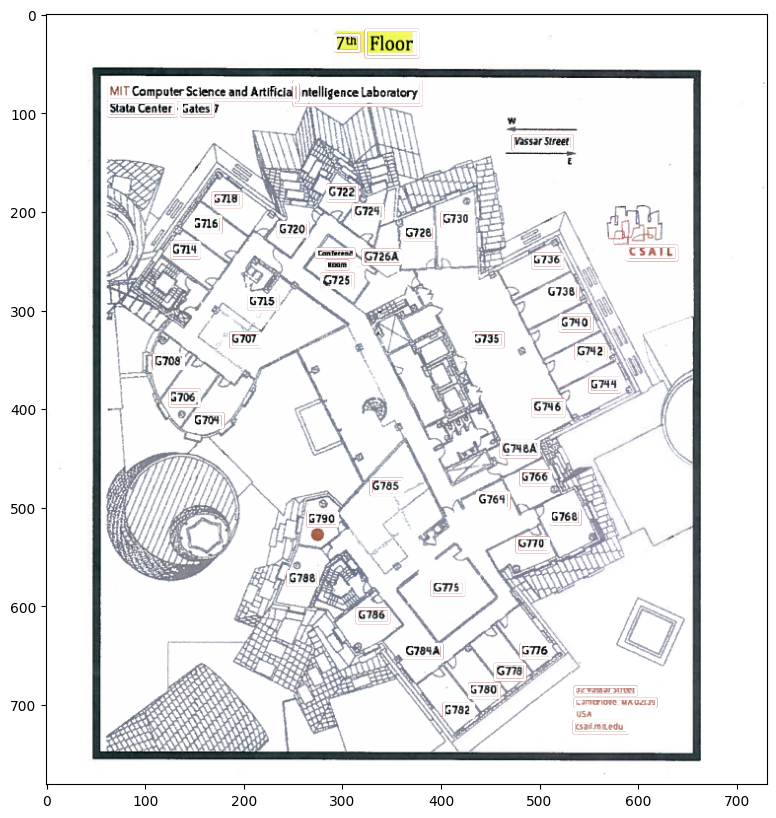

In [4]:
draw = PIL.ImageDraw.Draw(floor_plan)

for (bbox, text, prob) in result:
    fill = 128
    width = 3
    draw.line((bbox[0][0], bbox[0][1], bbox[1][0],
              bbox[1][1]), fill=fill, width=width)
    draw.line((bbox[1][0], bbox[1][1], bbox[2][0],
              bbox[2][1]), fill=fill, width=width)
    draw.line((bbox[2][0], bbox[2][1], bbox[3][0],
              bbox[3][1]), fill=fill, width=width)
    draw.line((bbox[3][0], bbox[3][1], bbox[0][0],
              bbox[0][1]), fill=fill, width=width)
    print(text)

plt.figure(figsize=(20, 10))
plt.imshow(floor_plan)

In [22]:
filtered = list(filter(lambda x: len(x) < 6 and (x[0] == '6' or x[0] == 'G'),
                map(lambda x: x[1], result)))[1:]

In [26]:
def good(x):
    if x[0] != 'G':
        return False
    if len(x) < 4:
        return False
    if len(x) == 5 and x[-1].isnumeric():
        return False
    return True
correct = list(filter(good, filtered))
correct

['G722',
 'G714',
 'G726A',
 'G708',
 'G744',
 'G706',
 'G704',
 'G790',
 'G788',
 'G782']

In [27]:
len(correct) / len(filtered)

0.2702702702702703